In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Dešťové srážky

V této úloze se podíváme na data z meteorologické stanice Vrbovce. Ve dnech 12.-13.9.2024 na této stanici vydatně pršelo. Díky datům z této stanice můžeme vypočítat výšku hladiny nebo objem vody ve sklenici, kterou bychom vedle stanice umístili při těchto srážkách.

In [12]:
data = pd.read_csv("Data.txt", sep = "\t", comment = "#")

#Zdroj dat: https://www.shmu.sk/sk/?page=838&id=&stationId=APS215100&uhrny=24#!

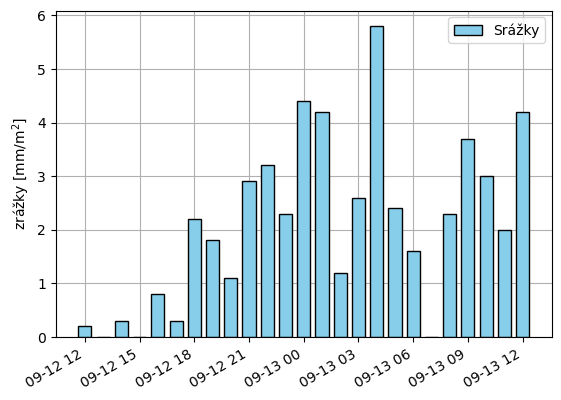

In [13]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["Čas merania"]
values = data["Zrážky 1h"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslení grafu
plt.bar(dates, values, label = "Srážky", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

plt.grid()

# plt.xlabel("Doba měření")
plt.ylabel("zrážky [mm/m$^2$]")
plt.legend()
plt.show()

Ve 12:00 12.9.2024 umístíme vedle meřící stanice ve Vrbovcích sklenici válcového tvaru o výšce $v = 13,5$ cm a pruměru $d = 8$ cm. Bude po 24 hodinách sklenice plná? Kolik bude ve sklenici vody?

Protože je sklenice válcového tvaru, bude záležet jen na výšce sklenice. Celkovou výšku hladiny ve sklenici vypočteme prostým součtem srážek. Protože údaje v tabulce jsou vždy srážky za uplnulou hodinu, tak data začneme sčítat až od 12.09.2024 13:00 místo 12.09.2024 12:00.

In [14]:
v_help = 0                          # Pomocná proměnná      
data["Vyska hladiny"] = 0           # Založení nového sloupce v naší Dataframe proměnné

for i in range(1,len(data)):
    v_help = data.loc[i, "Zrážky 1h"]
    if i == 0:
        data.loc[i, "Vyska hladiny"] = v_help
    else:
        data.loc[i, "Vyska hladiny"] = data.loc[i-1, "Vyska hladiny"]+v_help

/tmp/ipykernel_606/1249138730.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, "Vyska hladiny"] = data.loc[i-1, "Vyska hladiny"]+v_help


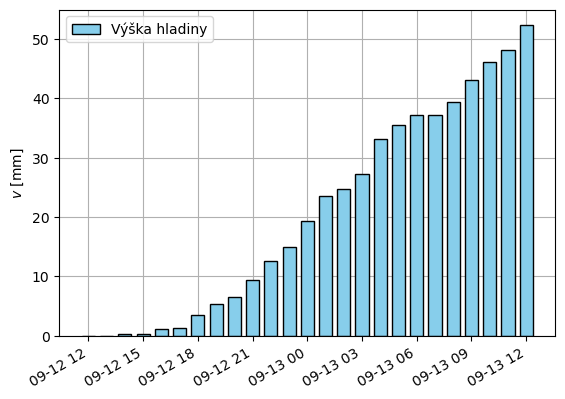

In [15]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["Čas merania"]
values = data["Vyska hladiny"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslení grafu
plt.bar(dates, values, label = "Výška hladiny", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

plt.grid()

# plt.xlabel("Doba měření")
plt.ylabel("$v$ [mm]")
plt.legend()
plt.show()

In [16]:
v = data.loc[24, "Vyska hladiny"]

print(f"Výška hladniy ve sklenici po 24 hodinách bude {v:,.1f} mm, takže naše sklenice plná nebude.")

Výška hladniy ve sklenici po 24 hodinách bude 52.3 mm, takže naše sklenice plná nebude.


Jaký je objem vody ve sklenici? K zodpovězení této otázky využijeme vzorec pro objem válce.

\begin{equation*}
    V = S v = \pi \left(\frac{d}{2} \right)^2 v
\end{equation*}

In [17]:
d = 0.8 # Hodnota v dm
S = np.pi * (d/2)**2
data["Objem"] = data["Vyska hladiny"]/100*S     #dělíme 100 abychom převedli na dm

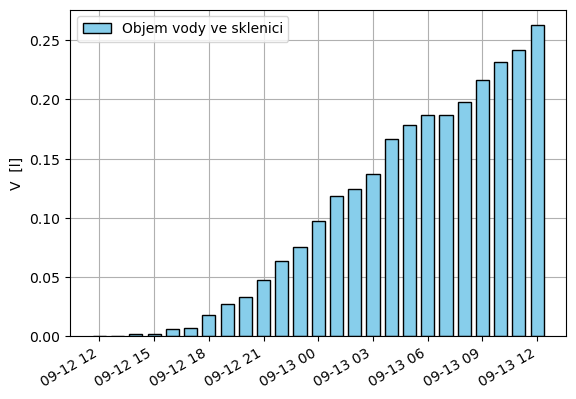

In [18]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["Čas merania"]
values = data["Objem"] 

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%d.%m.%Y %H:%M") for date in dates]

# Vykreslení grafu
plt.bar(dates, values, label = "Objem vody ve sklenici", width = 0.03, color = "skyblue", edgecolor = "black", zorder = 2)

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

plt.grid()

# plt.xlabel("Doba měření")
plt.ylabel("V  [l]")
plt.legend()
plt.show()

In [19]:
print(f"Do sklenice během 24 hodin napršelo {data.loc[24, "Objem"]:,.2f} litru.")

Do sklenice během 24 hodin napršelo 0.26 litru.
